
### Table of Contents
* [1) Pengumpulan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Validasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Konstruksi Data](#h6)
* [7) Menentukan label data](#h7)
* [8) Modelling](#h8)
* [9) Evaluasi](#h9)


## 1) Pengumpulan Data <a class="anchor" id="h1"></a>

1. Title: Postoperative Patient Data

2. Source Information:
   -- Creators: Sharon Summers, School of Nursing, University of Kansas
                Medical Center, Kansas City, KS 66160
                Linda Woolery, School of Nursing, University of Missouri,
                Columbia, MO 65211
   -- Donor:    Jerzy W. Grzymala-Busse (jerzy@cs.ukans.edu) (913)864-4488
   -- Date:     June 1993

3. Past Usage:
   1. A. Budihardjo, J. Grzymala-Busse, L. Woolery (1991). Program LERS_LB 2.5
      as a tool for knowledge acquisition in nursing, Proceedings of the 4th
      Int. Conference on Industrial & Engineering Applications of AI & Expert
      Systems, pp. 735-740.

   2. L. Woolery, J. Grzymala-Busse, S. Summers, A. Budihardjo (1991). The use
      of machine learning program LERS_LB 2.5 in knowledge acquisition for
      expert system development in nursing. Computers in Nursing 9, pp. 227-234.

4. Relevant Information:
      The classification task of this database is to determine where
      patients in a postoperative recovery area should be sent to next.  
      Because hypothermia is a significant concern after surgery
      (Woolery, L. et. al. 1991), the attributes correspond roughly to body
      temperature measurements.

## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Menampilkan semua kolom dari dataframe saat mencetak dataframe
pd.set_option("display.max_columns", None)


In [2]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengecek file dalam directory
!ls "/content/drive/MyDrive/BK-DS/04_WorkshopLSP/dataset/post-operative-new.data" # menampilkan daftar file/direktori untuk memastikan file tersedia

/content/drive/MyDrive/BK-DS/04_WorkshopLSP/dataset/post-operative-new.data


In [4]:
# data_path adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
data_path =  '/content/drive/MyDrive/BK-DS/04_WorkshopLSP/dataset/post-operative-new.data' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

In [5]:
# Membaca dan menampilkan dataset
data_df = pd.read_csv(data_path, delimiter=',', header=None) # membaca file  dari path yang telah didefinisikan sebelumnya.
data_df

,0,1,2,3,4,5,6,7,8,9
0,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
1,1,mid,high,excellent,high,stable,stable,stable,10,S
2,2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...,...
85,85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,86,mid,mid,excellent,mid,unstable,stable,stable,NaN,S
87,87,mid,mid,good,mid,unstable,stable,stable,15,A
88,88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [6]:
column_name = ['PATIENT_NUMBER', 'L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'decision ADM-DECS']

data_df.columns = column_name # Mengganti nama fitur sesuai panduan
data_df.head() # Menampilkan data 5 baris pertama dataset untuk melihat struktur data.

,PATIENT_NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
1,1,mid,high,excellent,high,stable,stable,stable,10,S
2,2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,4,mid,mid,excellent,high,stable,stable,stable,10,A


In [7]:
import numpy as np

data_df['COMFORT'] = data_df['COMFORT'].replace('?', np.nan)
data_df['COMFORT'] = pd.to_numeric(data_df['COMFORT'], errors='coerce')
data_df['COMFORT'] = data_df['COMFORT'].fillna(0).astype(int)

data_df['COMFORT'].value_counts()

,count
COMFORT,
10,58
15,17
0,12
5,2
7,1


In [8]:
# Mengganti nilai di kolom 'l-bp' dengan 'mid'
data_df['L-BP'] = data_df['L-BP'].replace('mid.1', 'mid')

# Mengganti nilai di kolom 'core-stbl' dengan 'stable'
data_df['CORE-STBL'] = data_df['CORE-STBL'].replace('stable.1', 'stable')

# Mengganti nilai di kolom 'bp-stbl' dengan 'stable'
data_df['BP-STBL'] = data_df['BP-STBL'].replace('stable.2', 'stable')

data_df.head()

,PATIENT_NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,0,mid,low,excellent,mid,stable,stable,stable,15,A
1,1,mid,high,excellent,high,stable,stable,stable,10,S
2,2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,4,mid,mid,excellent,high,stable,stable,stable,10,A


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PATIENT_NUMBER     90 non-null     int64 
 1   L-CORE             90 non-null     object
 2   L-SURF             90 non-null     object
 3   L-O2               81 non-null     object
 4   L-BP               90 non-null     object
 5   SURF-STBL          81 non-null     object
 6   CORE-STBL          90 non-null     object
 7   BP-STBL            90 non-null     object
 8   COMFORT            90 non-null     int64 
 9   decision ADM-DECS  89 non-null     object
dtypes: int64(2), object(8)
memory usage: 7.2+ KB


In [10]:
data_df.tail()

,PATIENT_NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
85,85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,86,mid,mid,excellent,mid,unstable,stable,stable,0,S
87,87,mid,mid,good,mid,unstable,stable,stable,15,A
88,88,mid,mid,excellent,mid,unstable,stable,stable,10,A
89,89,mid,mid,good,mid,unstable,stable,stable,15,S


In [11]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PATIENT_NUMBER,90.0,44.500000,26.124701,0.0,22.25,44.5,66.75,89.0
COMFORT,90.0,9.466667,4.316678,0.0,10.00,10.0,10.00,15.0


## 3) Validasi Data <a class="anchor" id="h3"></a>


In [12]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [13]:
def plot_categorical(dataframe, categorical_columns):

    # Jumlah kolom kategorikal
    num_cols = len(categorical_columns)
    # Kita membuat 2 subplot (countplot + pie plot) untuk setiap kolom
    fig, axes = plt.subplots(num_cols, 2, figsize=(17, 5 * num_cols))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # --- Bagian Countplot ---
        sns.countplot(
            x=col,
            data=dataframe,
            ax=axes[2*i],
            hue=col,
            palette="rocket"
        )
        axes[2*i].set_title(f'{col} Count', fontsize=12)
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # --- Bagian Pie Plot ---
        # Menentukan jumlah kategori unik
        unique_vals = dataframe[col].nunique()
        # Membuat list warna sesuai banyaknya kategori unik
        pie_colors = sns.color_palette("rocket", unique_vals)

        dataframe[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            ax=axes[2*i + 1],
            colors=pie_colors
        )
        axes[2*i+1].set_title(f'{col} Distribution', fontsize=12)
        axes[2*i+1].set_ylabel('')

    plt.tight_layout()
    plt.show()


In [14]:
# Membuat histogram bagi setiap kolom numerik dalam sebuah dataframe
def plot_histograms(dataframe, numeric_columns): # membuat histogram untuk setiap kolom numerik dalam dataset.

    num_cols = len(numeric_columns) # daftar kolom numerik yang akan divisualisasikan.
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20)  # Untuk mengurangi ukurannya, kami mengurangi nilai tempat sampah.
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])  # Jika jumlah kolom tidak habis dibagi 4, hapus sumbu yang berlebihan

    # menampilkan histogram frekuensi untuk setiap kolom numerik.
    plt.tight_layout()
    plt.show()

In [15]:
# Membuat visualisasi boxplot (diagram kotak) untuk semua kolom numerik yang diberikan
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 #Menghitung Jumlah Baris Grafik
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) # Membuat grid subplots dengan ukuran yang sesuai
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col]) # Iterasi Kolom Numerik untuk Membuat Boxplot
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    # Penentuan posisi subplot dalam grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) # Menghapus Grafik Kosong

    # Penyesuaian Layout
    plt.tight_layout()
    plt.show()

In [16]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data_df)

Jumlah observasi: 90
Jumlah variabel: 10
Kolom kategorikal: 9
Kolom Numerik: 1
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 1


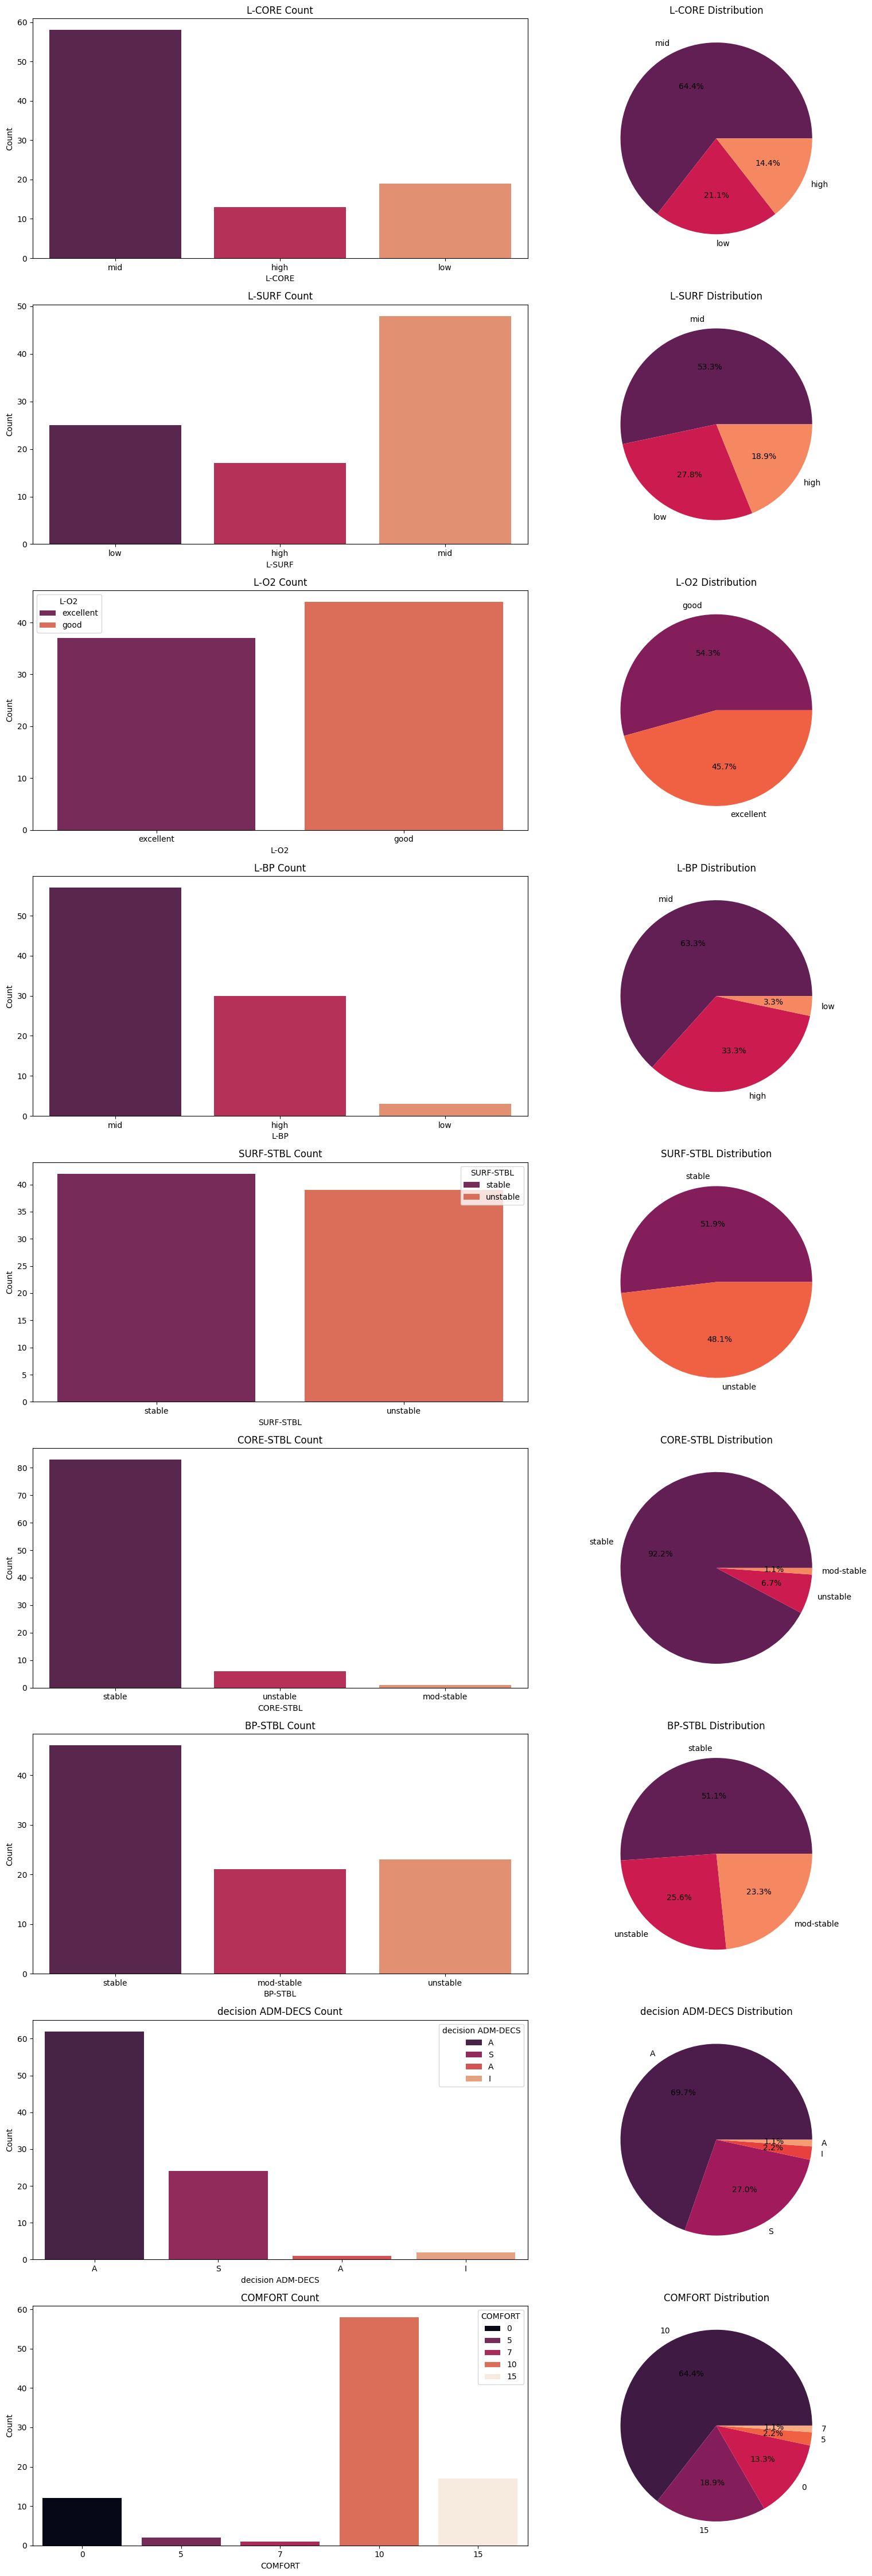

In [17]:
plot_categorical(data_df, cat_cols)

## 4) Menentukan Object Data <a class="anchor" id="h3"></a>


In [18]:
# Menampilkan 5 baris pertama dari dataframe data
data_df.head()

,PATIENT_NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,0,mid,low,excellent,mid,stable,stable,stable,15,A
1,1,mid,high,excellent,high,stable,stable,stable,10,S
2,2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,4,mid,mid,excellent,high,stable,stable,stable,10,A


In [19]:
# Menampilkan informasi ringkas tentang dataframe data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PATIENT_NUMBER     90 non-null     int64 
 1   L-CORE             90 non-null     object
 2   L-SURF             90 non-null     object
 3   L-O2               81 non-null     object
 4   L-BP               90 non-null     object
 5   SURF-STBL          81 non-null     object
 6   CORE-STBL          90 non-null     object
 7   BP-STBL            90 non-null     object
 8   COMFORT            90 non-null     int64 
 9   decision ADM-DECS  89 non-null     object
dtypes: int64(2), object(8)
memory usage: 7.2+ KB


In [20]:
data_df['decision ADM-DECS'].value_counts()

,count
decision ADM-DECS,
A,62
S,24
I,2
A,1


In [21]:
data_df['decision ADM-DECS'] = data_df['decision ADM-DECS'].str.strip()
data_df['decision ADM-DECS'].value_counts()

,count
decision ADM-DECS,
A,63
S,24
I,2


## 5) Membersihkan Data <a class="anchor" id="h3"></a>


In [22]:
data_clean = data_df.copy()

### Point 3 | Cek data kosong

### Point 5 | Handle data kosong.

In [23]:
data_clean.isnull().sum()

,0
PATIENT_NUMBER,0
L-CORE,0
L-SURF,0
L-O2,9
L-BP,0
SURF-STBL,9
CORE-STBL,0
BP-STBL,0
COMFORT,0
decision ADM-DECS,1


In [24]:
# Mendeteksi keberadaan nilai Null
data_clean.loc[:, data_clean.isnull().any()].columns

Index(['L-O2', 'SURF-STBL', 'decision ADM-DECS'], dtype='object')

In [25]:
# Daftar kolom yang ingin diisi dengan modus
cols_to_fill = ['L-O2', 'SURF-STBL', 'COMFORT', 'decision ADM-DECS']

# Mengisi nilai NaN dengan modus untuk kolom yang disebutkan
for col in cols_to_fill:
    data_clean[col].fillna(data_clean[col].mode()[0], inplace=True)

<ipython-input-25-694cd7bc7022>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean[col].fillna(data_clean[col].mode()[0], inplace=True)
<ipython-input-25-694cd7bc7022>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [26]:
data_clean['COMFORT'] = data_clean['COMFORT'].astype('int')

In [27]:
data_clean.isnull().sum()

,0
PATIENT_NUMBER,0
L-CORE,0
L-SURF,0
L-O2,0
L-BP,0
SURF-STBL,0
CORE-STBL,0
BP-STBL,0
COMFORT,0
decision ADM-DECS,0


In [28]:
# Menampilkan data duplikat
duplicate_rows = data_clean.duplicated()
print("All Duplicate Rows:")
data_clean[data_clean.duplicated(keep=False)]

All Duplicate Rows:


,PATIENT_NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS


In [29]:
data_clean.duplicated().sum()

0

In [30]:
data_clean.drop_duplicates(inplace=True)

In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PATIENT_NUMBER     90 non-null     int64 
 1   L-CORE             90 non-null     object
 2   L-SURF             90 non-null     object
 3   L-O2               90 non-null     object
 4   L-BP               90 non-null     object
 5   SURF-STBL          90 non-null     object
 6   CORE-STBL          90 non-null     object
 7   BP-STBL            90 non-null     object
 8   COMFORT            90 non-null     int64 
 9   decision ADM-DECS  90 non-null     object
dtypes: int64(2), object(8)
memory usage: 7.2+ KB


## 6) Konstruksi Data <a class="anchor" id="h6"></a>

In [32]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [33]:
cat_cols = data_clean.select_dtypes(include=['object']).columns
print("Fitur kategorikal sebelum encoding:")
cat_cols

Fitur kategorikal sebelum encoding:


Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'decision ADM-DECS'],
      dtype='object')

In [34]:
encoder = OrdinalEncoder()
data_clean[cat_cols] = encoder.fit_transform(data_clean[cat_cols])
print("Fitur kategorikal setelah encoding:")
data_clean.head()

Fitur kategorikal setelah encoding:


,PATIENT_NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,15,0.0
1,1,2.0,0.0,0.0,0.0,0.0,1.0,1.0,10,2.0
2,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10,0.0
3,3,2.0,1.0,1.0,0.0,0.0,2.0,0.0,15,0.0
4,4,2.0,2.0,0.0,0.0,0.0,1.0,1.0,10,0.0


In [35]:
data_clean.drop('PATIENT_NUMBER', axis=1, inplace=True)

### Visualisasi distribusi dari masing-masing fitur

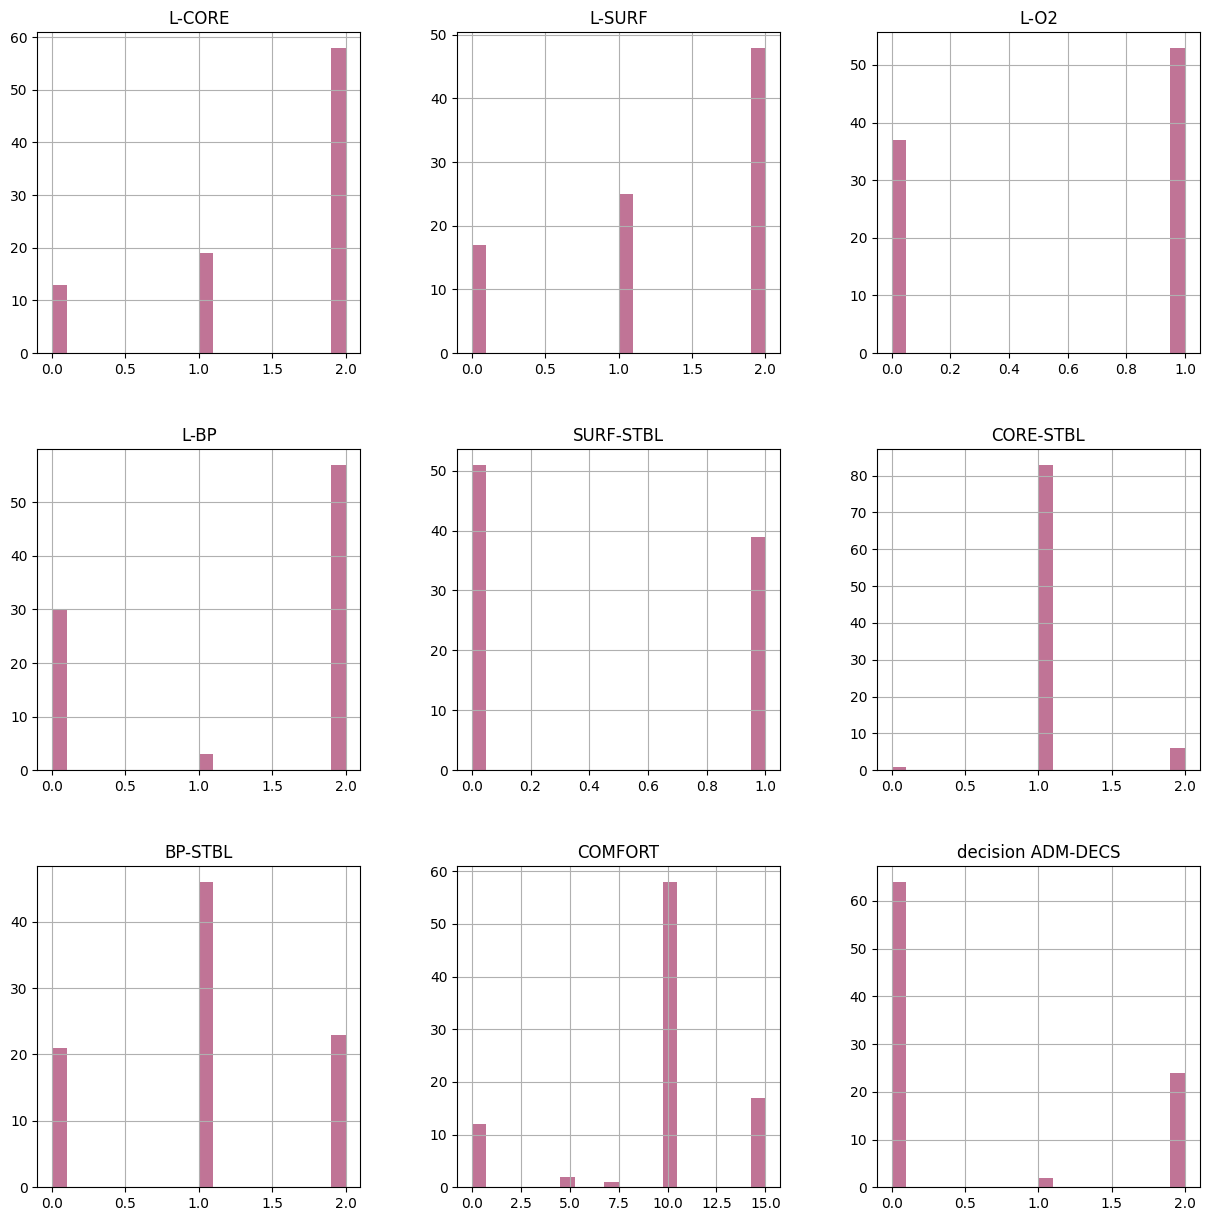

In [36]:
data_clean.hist(bins=20, figsize=(15, 15), color='#c07496')
plt.show()

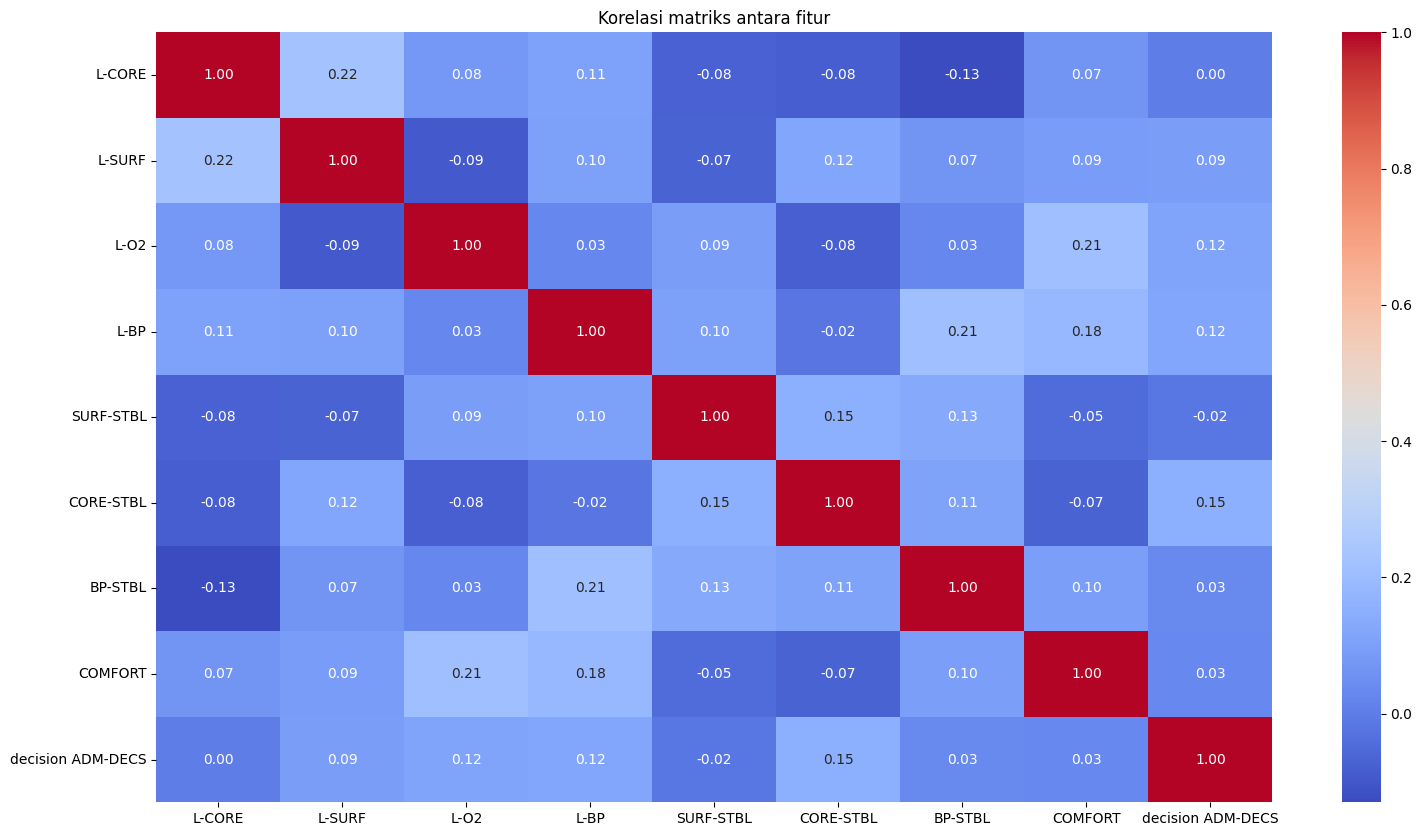

In [37]:
# Correlation matrix
correlation_matrix = data_clean.corr()

# Plotting the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi matriks antara fitur')
plt.show()

In [38]:
data_clean.corr()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
L-CORE,1.000000e+00,0.224047,0.076904,0.105076,-0.076361,-0.083074,-0.129949,0.066994,6.277923e-17
L-SURF,2.240465e-01,1.000000,-0.094628,0.102341,-0.070229,0.119197,0.067761,0.088401,9.354806e-02
L-O2,7.690447e-02,-0.094628,1.000000,0.026530,0.092661,-0.078037,0.026568,0.211828,1.164626e-01
L-BP,1.050761e-01,0.102341,0.026530,1.000000,0.102975,-0.021711,0.210560,0.183563,1.209113e-01
SURF-STBL,-7.636125e-02,-0.070229,0.092661,0.102975,1.000000,0.150414,0.132616,-0.048056,-1.692292e-02
CORE-STBL,-8.307378e-02,0.119197,-0.078037,-0.021711,0.150414,1.000000,0.109886,-0.069454,1.483070e-01
BP-STBL,-1.299492e-01,0.067761,0.026568,0.210560,0.132616,0.109886,1.000000,0.096546,3.399869e-02
COMFORT,6.699434e-02,0.088401,0.211828,0.183563,-0.048056,-0.069454,0.096546,1.000000,3.125696e-02
decision ADM-DECS,6.277923e-17,0.093548,0.116463,0.120911,-0.016923,0.148307,0.033999,0.031257,1.000000e+00


## 7) Menentukan Label Data <a class="anchor" id="h6"></a>

In [39]:
X = data_clean.drop('decision ADM-DECS', axis=1)
y = data_clean['decision ADM-DECS']

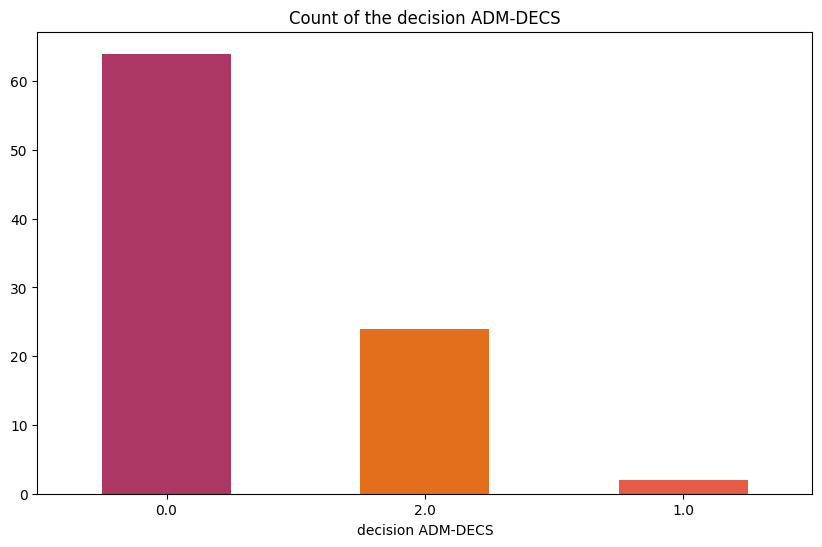

In [51]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data_clean['decision ADM-DECS'].value_counts().plot(kind='bar',figsize=(10,6),color=['#ac3664','#e36f1d',"#e45c46"])
plt.title("Count of the decision ADM-DECS")
plt.xticks(rotation=0);

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting Datasets

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8) Modelling <a class="anchor" id="h6"></a>

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2', min_samples_leaf=1, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)

## 9) Evaluasi <a class="anchor" id="h6"></a>

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [45]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [46]:
y_pred_dt = dt.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision tree Model:
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77        24
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.63        27
   macro avg       0.28      0.24      0.26        27
weighted avg       0.76      0.63      0.69        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

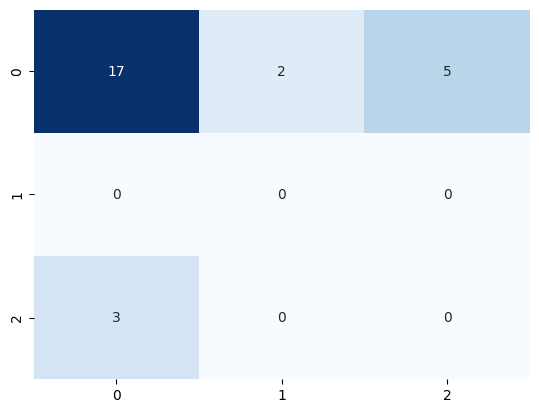

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

grid_search = GridSearchCV(dt, param_grid, cv=7, scoring='accuracy')

grid_search.fit(X_train, y_train)  # X_train dan y_train adalah data training

print(f"Parameter terbaik: {grid_search.best_params_}")

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)  # X_test adalah data testing

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=7.
  warnings.warn(


Parameter terbaik: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
630 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

<Axes: >

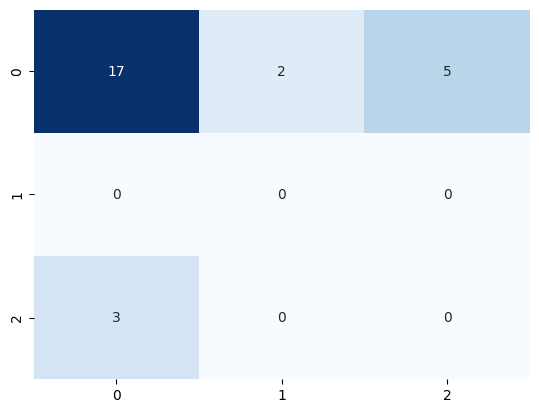

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


**True Positive (TP):**

Kelas 0: 17 data dari kelas aktual 0 diprediksi benar sebagai kelas 0.

Kelas 1 dan kelas 2: Tidak ada data aktual dari kelas ini yang diprediksi benar.

**False Negative (FN):**

Kelas 0: Sebanyak 7 data kelas aktual 0 salah diprediksi (2 ke kelas 1 dan 5 ke kelas 2).

Kelas 1 dan kelas 2: Semua data salah diprediksi.

**False Positive (FP):**

Kelas 0: Sebanyak 3 data dari kelas aktual 2 salah diprediksi sebagai kelas 0.

Tidak ada prediksi untuk kelas 1 dan kelas 2.

**Kesimpulan:**

Model bekerja cukup baik pada kelas mayoritas (kelas 0), namun gagal memprediksi kelas minoritas (kelas 1 dan kelas 2).


In [50]:
# Evaluate the Decision Tree model
y_pred_dt = best_dt.predict(X_test)

print("\nDecision tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision tree Model:
Accuracy: 0.889
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        24
         2.0       0.00      0.00      0.00         3

    accuracy                           0.89        27
   macro avg       0.44      0.50      0.47        27
weighted avg       0.79      0.89      0.84        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Hasil evaluasi model (Decision Tree):**



Akurasi: 0.89 (89%)

Model memiliki tingkat akurasi yang cukup baik secara keseluruhan.

Penjelasan:

Precision:

* Kelas 0: Precision sebesar 0.89 menunjukkan bahwa 89% prediksi kelas 0 benar.

* Kelas 2: Precision adalah 0.00 karena tidak ada prediksi yang benar untuk kelas ini.

Recall:

* Kelas 0: Recall sebesar 1.00 berarti semua data aktual kelas 0 berhasil diprediksi dengan benar.

* Kelas 2: Recall adalah 0.00 karena tidak ada data aktual kelas 2 yang diprediksi benar.

F1-Score:

* Kelas 0 memiliki skor F1 sebesar 0.94, menunjukkan keseimbangan precision dan recall.

* Kelas 2 memiliki skor F1 sebesar 0.00 karena precision dan recall sama-sama nol.

Macro Average:

* Precision rata-rata antar kelas adalah 0.44, recall 0.50, dan F1-score 0.47.
Ini memberikan gambaran rata-rata performa antar kelas tanpa mempertimbangkan ketidakseimbangan jumlah data.

Weighted Average:

* Precision, recall, dan F1-score dihitung berdasarkan bobot (jumlah data) tiap kelas.
